<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Optimization_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals:
* Learn how to do nonlinear least square minimization
* Understand what equality and inequality constrained optimization is
* See how equality constrained optimization can be modified to an unconstrained optimization via Lagrange Multipliers
* Understand the value of Lagrange Multipliers and how to interpret the output of modern optimization codes.

# Nonlinear least-squares regression

There is one more important unconstrained minimization that we should discuss: non-linear least-squares, which is the extension of the linear least-square regression we did for curve fitting.

Now, we have several measurements in pairs $(x_i, y_i)$ and we wish to fit a function of $x$ which depends in some complex, nonlinear fashion on a set of parameters $\beta$. E.g.: $f(x,\beta) = sin(\beta_1 x) e^{\beta_2 x^3}$

Our goal is to choose the set of *parameteres* $\beta$ that minimizes the of the sum of the least squares of the residuals, $r_i = f(x_i,\beta) - y_i$:

$$\begin{align}
\min_\beta F = \min_\beta \sum_i r_i^2 = \min_\beta \sum_i [f(x_i,\beta) - y_i]^2
\end{align}$$

Note: $F$ is necessarily symmetric and positive semidefinite, therefore any extremum is a minimum.

## Gauss-Newton's regression:


Let's consider Newton's optimization:

$$ \frac{\partial^2 F}{\partial \beta^2} \Delta \beta = - \frac{\partial F}{\partial \beta} $$

Since $F$ is the sum of squared $r_i$ we can expand:
$$ \begin{align}
\frac{\partial F}{\partial \beta} = 2 r \frac{\partial r}{\partial \beta} = 2 r J
\end{align} $$

where $J = \frac{\partial r}{\partial \beta}$ is the Jacobian of the residuals with respect to the parameters. Since we typically have more data points (residuals) than parameters, this is rectangular.

The Hessian is expanded:
$$ \begin{align}
\frac{\partial^2 F}{\partial \beta^2} &= 2 \sum_i \frac{\partial r_i}{\partial \beta_j} \frac{\partial r_i}{\partial \beta_k} + r \frac{\partial^2 r_i}{\partial \beta_j \partial \beta_k} \\
&= 2\bigg[ J J^T +  r \frac{\partial^2 r_i}{\partial \beta_j \partial \beta_k} \bigg]
\end{align} $$

The second derivative in the Hessian is troublesome for computation. Luckily, near the root $r\rightarrow 0$ and we can disregard the term entirely:

$$\begin{align}
\frac{\partial^2 F}{\partial \beta^2} \approx 2 \sum_i J J^T
\end{align} $$

Our minimization now becomes,

$$ \begin{align}
J J^T \Delta \beta &= -J r \\
\Delta \beta &= -[J J^T]^{-1} J r \\
&= -J^\dagger r
\end{align}
$$

where $J^\dagger$ is the pseudoinverse of the Jacobian!


This is an interesting result since it suggests we could write the original problem as solving $J \Delta \beta = -r$ which is the Newton-Raphson method for *root finding*, not minimization... Remember however, that this is the *pseudoinverse*, not the true inverse. Indeed, if we had exactly as many data points as parameters, $J$ would be square, and we *would* be able to find the exact solution which is the root! The fact that this is analagously true for least squares regression comes from 1) approximating the Hessian as the product of Jacobians, and 2) properties of the pseudo-inverse in performing linear least-squares.

## The Levenberg-Marquardt algorithm

The problem with Gauss-Newton is that the Hessian approximation is only good near the root, and the method fails unless the initial guess is good.

Levenberg-Marquardt blends Gauss-Newton with Gradient decent:

$$
[J J^T + \lambda I ] \Delta \beta = -J r
$$

When $\lambda$ is small, the method reduces to Gauss-Newton. When it is large, the $J J^T$ term can be disregarded and the method is simply gradient decent. Determination of $\lambda$ is a matter of heuristics and implementation.

The Levenberg-Marquart algorithm is the go-to for common lst solvers including scipy, numpy, and tools like Excel.

### Example: Nonlinear curve fit

Fitted parameters: [2.55266109 1.34621434 0.47897151]


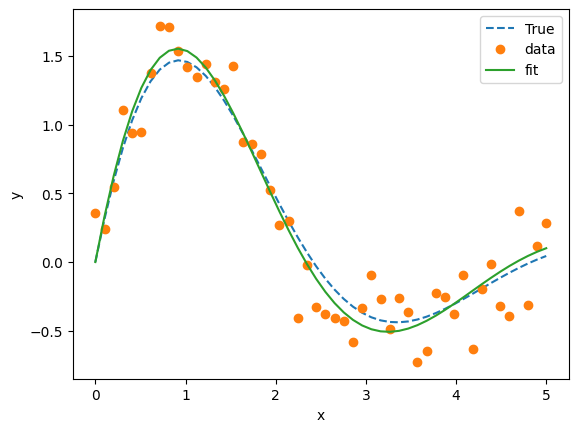

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def func(x, a, b, c):
  return a * np.sin(b * x) * np.exp(-c * x)

# Generate some sample data
x_data = np.linspace(0, 5, 50)
y_data = func(x_data, 2.5, 1.3, 0.5) + np.random.normal(0, 0.2, 50)

# Perform the curve fit
popt, _ = curve_fit(func, x_data, y_data)

# Print the fitted parameters
print("Fitted parameters:", popt)

# Generate the fitted curve
y_fit = func(x_data, *popt)

# True function
y_true = func(x_data, 2.5, 1.3, .5)

# Plot the data and the fitted curve
plt.plot(x_data, y_true, '--', label='True')
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, y_fit, '-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Example: Nonlinear 2D curve fit

Fitted parameters: [ 9.99242341e-01 -1.10886030e-03  1.03302831e+00  6.17376908e-04
  9.68851674e-01 -3.79420297e-03]


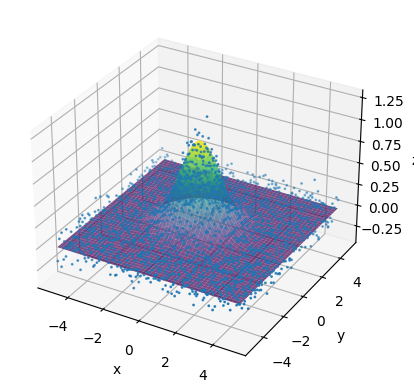

In [2]:
# prompt: make a 2D example of a nonlineaar curve_fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Define the function to fit (e.g., a 2D Gaussian)
def func(X, a, b, c, d, e, f):
  x, y = X
  return a * np.exp(-((x - b)**2 / (2 * c**2) + (y - d)**2 / (2 * e**2))) + f

# Generate some sample data
x_data = np.linspace(-5, 5, 50)
y_data = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_data, y_data)
Z_data = func((X, Y), 1, 0, 1, 0, 1, 0) + np.random.normal(0, 0.1, (50, 50))

# Flatten the data for curve_fit
x_data_flat = X.flatten()
y_data_flat = Y.flatten()
z_data_flat = Z_data.flatten()

# Perform the curve fit
initial_guess = [1, 0, 1, 0, 1, 0]  # Provide an initial guess for the parameters
popt, _ = curve_fit(func, (x_data_flat, y_data_flat), z_data_flat, p0=initial_guess)

# Print the fitted parameters
print("Fitted parameters:", popt)

# Generate the fitted surface
Z_fit = func((X, Y), *popt)


# Plot the data and the fitted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data_flat, y_data_flat, z_data_flat, label='data', s = 1)
ax.plot_surface(X, Y, Z_fit, cmap='viridis', alpha=0.7, label='fit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


#Equality constrained optimization

So far we have discussed how to find $x$ that minimizes $f(x$), which is called 'unconstrained minimization'. We now add *equality constraints*:

Find $x$ that minimizes $f(x$) subject to $g(x) = 0$. Note that $g(x)$ can be a vector function if there are multiple equality constraints.

E.g.: If you wanted to minimize something on the unit circle, your constraint would be,

$$\begin{align}
x^2+y^2&=1 \\
x^2+y^2-1 &= 0 \\
g(x,y) &=0
\end{align} $$

## Penalty method

One way to enforce the constraints is to add them to the objective function as a penalty:

$$ f(x) + \lambda g(x) $$ where $\lambda$ is some suitably chosen constant. If the constraint is violate, i.e.: $g(x) \ne 0$, the combined objective is penalized. By increasing $\lambda$, one enforces the penalty more severely.

Recall that the solvability of a system is related to its landscape. An excessively large $\lambda$ will enforce the condition but introduce significant terrain to the surface. However, too small a $\lambda$ will not affect the constraint at all! Algoithms that use this method have heuristic mecahnisms for adjusting the penalty depending on the violation of the constraints.

Note however, that there is a Goldilocks value that is *just right* in that it is the smallest value that is large enough to affect the constraint...  

## Method of undetermined Lagrange Multipliers

At the optimium, we know that $g(x)=0$ in which case it doesn't matter what $\lambda$ is, as long as it is *big enough to enforce the constraint*.

In this case, why not add $\lambda$ as an unknown variable to be solved for? In this case, $\lambda$ are called the Lagrange Mulitpliers. The summation of the objective function and the penalized equality constraints is called the Lagrangian,

$$ L(x, \lambda) = f(x) + \lambda \cdot g(x) $$

and is now a function of $\lambda$ as well.

The system is solved for the stationary point, $$\frac{\partial L}{\partial [x,\lambda] = 0}$$ which implies, starting with $\lambda$:

$$\frac{\partial L}{\partial \lambda} = 0 = g(x)$$

and thus the constraints are enforced.





The derivative wrt $x$ is more interesting and reads,

$$ \begin{align}
\frac{\partial L}{\partial x} = 0 &= \nabla f(x) + \lambda \nabla g(x) \\
\nabla f(x)  &= -\lambda \nabla g(x)
\end{align} $$

This means that along the curve defined by $g(x)=0$ there is a point where the the gradient $\nabla f$ is exactly perpendicular to the curve (and therefore parallel to $\nabla g$). The difference in magnitude, being the force with which one wants to keep to the curve, is $\lambda$.

>Consider a 2D analogy: You are hiking on a mountain along a path ($g(x)=0$). As you go, the path leads you along the height of the mountain ($f(x)$). You want to find the lowest point, so you simply walk 'downhill' along the path until you reach the lowest point. Here, the ground slopes exactly away (perpendicular) from the path. What's more, for you to stay on the path, you will have to push your legs *exactly uphill* with precisely the necessary force $\lambda$, so as to  not fall to your death but stay on the path.



### Quadratic programming with equality constraints

The interesting thing about this technique is that we have replaced a constrained optimization with an unconstrained method, which can now be solved using our established techniques!

Unfortuantely, except in certain cases this doesn't usually work... One case where it works well is for a quadratic objective function with a set of equality constraints.


$$g(x) = A x-b = 0$$

As we discussed, quadratic functions can be solved directly through Newton's method. With a quadratic objective function $f(x)$ and linear constraints $g(x) = Ax-b$ the Lagrangian is also quadratic.

$$ L(x, \lambda) = f(x) + \lambda \cdot [Ax-b] $$

We have,  
$$\begin{align}
\frac{\partial f}{\partial x} &= H x + c \\
\frac{\partial L}{\partial x} &= H x + c + \lambda A
\end{align} $$



and the Jacobian of the Lagrangian can be written as a block matrix,


$$
\begin{bmatrix}
H & A^T \\
A & 0
\end{bmatrix}
\begin{bmatrix}
x \\
\lambda
\end{bmatrix}
=
\begin{bmatrix}
-c \\
b
\end{bmatrix}
$$

which is, once again, a (square) linear system!

NB: Don't be scared off by the 0 block on the diagonal. For well-formed problems this matrix is non-singular *even if H is not!*

#### Example: Minimize $x y +yz$ subject to $x+2y = 6$ and $x=3z$


We have the objective function, $f(x) = xy+yz$ with Hessian
$$H=\begin{bmatrix} 0 & 1 & 0 \\ 1& 0 & 1 \\ 0 & 1& 0\end{bmatrix} $$ and $$c = \begin{bmatrix} 0 \\0 \\ 0 \end{bmatrix}$$

The constraints are $$ g = \begin{bmatrix} 1 & 2 & 0 \\ 1 & 0 & -3 \end{bmatrix} x - \begin{bmatrix} 6 \\ 0 \end{bmatrix} = 0$$

Our KKT matrix then is,

In [3]:
import scipy as sp
A = np.array([
    [0, 1, 0, 1, 1],
    [1, 0, 1, 2, 0],
    [0, 1, 0, 0, -3],
    [1, 2, 0, 0, 0],
    [1, 0,-3, 0, 0]])

b = np.array([0,0,0,6,0])

sp.linalg.solve(A, b)

array([ 3. ,  1.5,  1. , -2. ,  0.5])

Lets dig into this matrix a little more:

In [4]:
evals, evects= sp.linalg.eig(A)
print(np.round(evals,2))

[-3.34+0.j -0.82+0.j -1.9 +0.j  2.81+0.j  3.26+0.j]


Note that the eigenvalues are of opposite sign! This means that the system is indefinite, and the optimum is a saddle point.

This is typical of Lagrange Multiplier problems and is the reason why standard optimization techniques have difficulty. However, the block structure of the KKT matrix does make it ammenable to block matrix inversion (and the zero block helps!).

Constrained optimization algorithms exploit these properties.

## Meaning of the Lagrange Multipliers

The Lagrange Multipliers are also physically important parameters and this is why they are sought-after over penalty methods. They give the *value* of relaxing a constraint.

* In engineering, they are the *constraint force* associated with some imposed condition.
* In economics, this is *marginal cost / shadow price* of the constraint and tell you the worth of doing a little bit more.
* In thermodynamics they are the *conjugate state variable* corresponding to a particular equilibrium.


#General constrained optimization

The algorithms for solving the general optimizaiton problem subject to nonlinear constraints and inequality constraints, generally involve defining *feasible* regions for which inequalities are satisfied, and searching *interior points* for the constrained optimum. The derivations can be very sophisticated, well beyond the scope of this course!

#### Example: Minimize $x^4 + y^4$ on the unit circle.

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.49999938348959805
       x: [ 7.071e-01  7.071e-01]
     nit: 23
     jac: [ 1.414e+00  1.414e+00]
    nfev: 93
    njev: 23


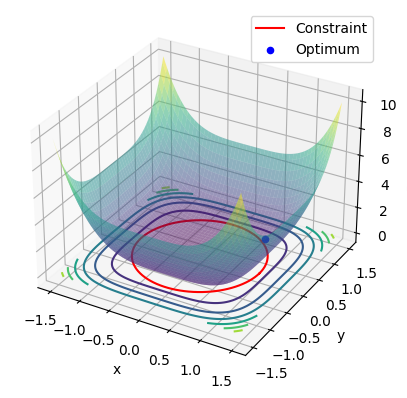

In [5]:
# prompt: Optimize x^4+y^4 subject to x^2+y^2-1, plot the objective, constraint,  and the optimization path

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D


def objective(x):
  return x[0]**4 + x[1]**4

def constraint(x):
  return x[0]**2 + x[1]**2 - 1

# Initial guess
x0 = [0.5, 0.5]

# Constraints
cons = ({'type': 'eq', 'fun': constraint})

# Optimization
sol = minimize(objective, x0, method='SLSQP', constraints=cons)

# Print results
print(sol)

# Plot the objective function and constraint
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = X**4 + Y**4

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')

# Plot the constraint
theta = np.linspace(0, 2 * np.pi, 100)
x_constraint = np.cos(theta)
y_constraint = np.sin(theta)
ax.plot(x_constraint, y_constraint, 0, color='red', label='Constraint')

# Plot the optimum
ax.scatter(sol.x[0], sol.x[1], sol.fun, color='blue', marker='o', label='Optimum')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Objective')
ax.legend()
plt.show()

          message: `gtol` termination condition is satisfied.
          success: True
           status: 1
              fun: -2.000000000000006
                x: [ 7.071e-01  7.071e-01]
              nit: 6
             nfev: 18
             njev: 6
             nhev: 0
         cg_niter: 4
     cg_stop_cond: 1
             grad: [-2.828e+00 -2.828e+00]
  lagrangian_grad: [-4.441e-16 -4.441e-16]
           constr: [array([ 3.109e-15])]
              jac: [array([[ 1.414e+00,  1.414e+00]])]
      constr_nfev: [18]
      constr_njev: [0]
      constr_nhev: [0]
                v: [array([ 2.000e+00])]
           method: equality_constrained_sqp
       optimality: 4.440892098500626e-16
 constr_violation: 3.1086244689504383e-15
   execution_time: 0.012612104415893555
        tr_radius: 5.6000000000000005
   constr_penalty: 54232153.21343036
            niter: 6


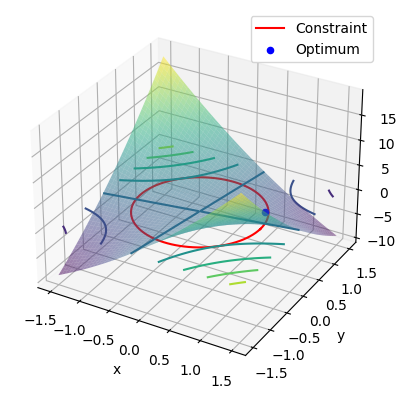

In [6]:
# prompt: minimize x^2-6xy+y^2 on the unit circle using trust-const and plot hte surface and the constraint

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

def objective(x):
  return x[0]**2 - 6*x[0]*x[1] + x[1]**2

def constraint(x):
  return x[0]**2 + x[1]**2 - 1

# Initial guess
x0 = [0., 0.]

# Constraints
cons = ({'type': 'eq', 'fun': constraint})

# Optimization using trust-constr
sol = minimize(objective, x0, method='trust-constr', constraints=cons)

# Print results
print(sol)

# Plot the objective function and constraint
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 - 6*X*Y + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')

# Plot the constraint
theta = np.linspace(0, 2 * np.pi, 100)
x_constraint = np.cos(theta)
y_constraint = np.sin(theta)
ax.plot(x_constraint, y_constraint, 0, color='red', label='Constraint')

# Plot the optimum
ax.scatter(sol.x[0], sol.x[1], sol.fun, color='blue', marker='o', label='Optimum')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Objective')
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: -0.23246557515821553
                 x: [-4.502e-01 -5.316e-10]
               nit: 55
              nfev: 156
              njev: 52
              nhev: 0
          cg_niter: 48
      cg_stop_cond: 4
              grad: [ 5.588e-09 -2.049e-08]
   lagrangian_grad: [ 1.440e-09 -2.049e-08]
            constr: [array([-7.973e-01])]
               jac: [array([[-9.004e-01, -1.490e-08]])]
       constr_nfev: [156]
       constr_njev: [0]
       constr_nhev: [0]
                 v: [array([ 4.607e-09])]
            method: tr_interior_point
        optimality: 2.0489096710195873e-08
  constr_violation: 0.0
    execution_time: 0.08072233200073242
         tr_radius: 1.0000000000000005e-09
    constr_penalty: 1.0
 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
             niter: 55


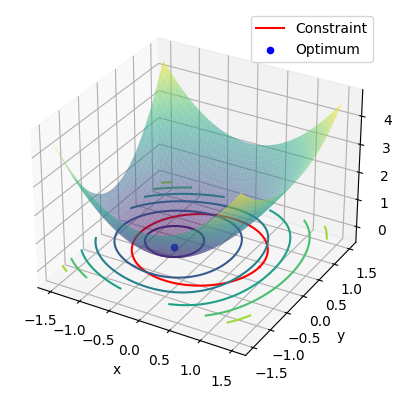

In [7]:
# prompt: Minimize a complex 2D function on the unit disk using trust-const

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp

def objective(x):
  """Objective function to minimize."""
  return np.sin(x[0]) * np.cos(x[1]) + x[0]**2 + x[1]**2

def constraint(x):
  """Constraint function: x^2 + y^2 <= 1 (unit disk)."""
  return x[0]**2 + x[1]**2 - 1

# Initial guess
x0 = [0.5, 0.5]

# Constraints
cons = sp.optimize.NonlinearConstraint(lambda x: x[0]**2 + x[1]**2 - 1, -np.inf, 0)

# Optimization using trust-constr
sol = minimize(objective, x0, method='trust-constr', constraints=cons)

# Print results
print(sol)

# Plot the objective function and constraint
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y) + X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')

# Plot the constraint (unit disk boundary)
theta = np.linspace(0, 2 * np.pi, 100)
x_constraint = np.cos(theta)
y_constraint = np.sin(theta)
ax.plot(x_constraint, y_constraint, 0, color='red', label='Constraint')

# Plot the optimum
ax.scatter(sol.x[0], sol.x[1], sol.fun, color='blue', marker='o', label='Optimum')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Objective')
ax.legend()
plt.show()
